# Mahdi Results

In [33]:
import re
from fmc import *
from pathlib import Path
from operator import itemgetter

data = Path("data")
figures = Path("figures")

### Define Samples, Filenames, Labels and Mass Spec Peaks

In [4]:
samples = ['Control','E1','E2','E3','E4','E5','E6','M1','M2','M3','M4','M5','M6']

In [5]:
# Check for correct correspondence between samples and data.glob('*.txt') 
fns = {s: fn for s, fn in zip(samples,sorted(data.glob('*.txt')))}
fns

{'Control': PosixPath('data/2024_04_08_C-mer_Control_0_A9_1.txt'),
 'E1': PosixPath('data/2024_04_08_E1_K2S2O5_ETNH2_pH_7.7_30_min_0_C8_1.txt'),
 'E2': PosixPath('data/2024_04_08_E2_K2S2O5_ETNH2_pH_7.5_30_min_0_D9_1.txt'),
 'E3': PosixPath('data/2024_04_08_E3_K2S2O5_ETNH2_pH_7.3_30_min_0_E9_1.txt'),
 'E4': PosixPath('data/2024_04_08_E4_K2S2O5_ETNH2_pH_7.7_60_min_0_I8_1.txt'),
 'E5': PosixPath('data/2024_04_08_E5_K2S2O5_ETNH2_pH_7.5_60_min_0_J8_1.txt'),
 'E6': PosixPath('data/2024_04_08_E6_K2S2O5_ETNH2_pH_7.3_60_min_0_K9_1.txt'),
 'M1': PosixPath('data/2024_04_08_M1_K2S2O5_MENH2_pH_7.7_30_min_0_F9_1.txt'),
 'M2': PosixPath('data/2024_04_08_M2_K2S2O5_MENH2_pH_7.5_30_min_0_G10_1.txt'),
 'M3': PosixPath('data/2024_04_08_M3_K2S2O5_MENH2_pH_7.3_30_min_0_H9_1.txt'),
 'M4': PosixPath('data/2024_04_08_M4_K2S2O5_MENH2_pH_7.7_60_min_0_L9_1.txt'),
 'M5': PosixPath('data/2024_04_08_M5_K2S2O5_MENH2_pH_7.5_60_min_0_M7_1.txt'),
 'M6': PosixPath('data/2024_04_08_M6_K2S2O5_MENH2_pH_7.3_60_min_0_N7_1.txt

In [6]:
labels = {s:fn.stem.split('min')[0]+'min' for s, fn in fns.items()}
labels

{'Control': '2024_04_08_C-mer_Control_0_A9_1min',
 'E1': '2024_04_08_E1_K2S2O5_ETNH2_pH_7.7_30_min',
 'E2': '2024_04_08_E2_K2S2O5_ETNH2_pH_7.5_30_min',
 'E3': '2024_04_08_E3_K2S2O5_ETNH2_pH_7.3_30_min',
 'E4': '2024_04_08_E4_K2S2O5_ETNH2_pH_7.7_60_min',
 'E5': '2024_04_08_E5_K2S2O5_ETNH2_pH_7.5_60_min',
 'E6': '2024_04_08_E6_K2S2O5_ETNH2_pH_7.3_60_min',
 'M1': '2024_04_08_M1_K2S2O5_MENH2_pH_7.7_30_min',
 'M2': '2024_04_08_M2_K2S2O5_MENH2_pH_7.5_30_min',
 'M3': '2024_04_08_M3_K2S2O5_MENH2_pH_7.3_30_min',
 'M4': '2024_04_08_M4_K2S2O5_MENH2_pH_7.7_60_min',
 'M5': '2024_04_08_M5_K2S2O5_MENH2_pH_7.5_60_min',
 'M6': '2024_04_08_M6_K2S2O5_MENH2_pH_7.3_60_min'}

In [66]:
pat = r'(pH.*)'
labels_short = {s:  ' '.join(re.search(pat, l).group().split('_')) for s,l in labels.items() if re.search(pat, l)}
labels_short

{'E1': 'pH 7.7 30 min',
 'E2': 'pH 7.5 30 min',
 'E3': 'pH 7.3 30 min',
 'E4': 'pH 7.7 60 min',
 'E5': 'pH 7.5 60 min',
 'E6': 'pH 7.3 60 min',
 'M1': 'pH 7.7 30 min',
 'M2': 'pH 7.5 30 min',
 'M3': 'pH 7.3 30 min',
 'M4': 'pH 7.7 60 min',
 'M5': 'pH 7.5 60 min',
 'M6': 'pH 7.3 60 min'}

In [7]:
peaks = {s: read_ms_txt(fn) for s, fn in fns.items()}
peaks

{'Control': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([ 80, 125, 160, ...,  52,  87, 118])),
 'E1': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([24, 45, 61, ..., 35, 47, 52])),
 'E2': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([13,  7,  8, ..., 11, 16, 17])),
 'E3': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([14,  3,  6, ..., 32, 20, 15])),
 'E4': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([118, 101,  87, ..., 169, 151, 133])),
 'E5': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([36, 49, 54, ..., 61, 44, 43])),
 'E6': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([ 31,  13,  19, ..., 110,  96,  51])),
 'M1': (array([1400.03 , 1400.043, 1400.056, ..., 1739.985, 1740.   , 1740.014]),
  array([11,  7, 32, ..., 34, 35, 

### Choose Sample Grouping

In [8]:
e1_m3_30 = ['Control','E1','E2','E3','M1','M2','M3']

In [9]:
e4_m6_60 = ['Control','E4','E5','E6','M4','M5','M6']

In [10]:
es = ['E1','E2','E3','E4','E5','E6']

In [11]:
ms = ['M1','M2','M3','M4','M5','M6']

### Plot Mass Spec

In [12]:
plot_spec?

Signature:
plot_spec(
    peaks,
    title=None,
    save_as=None,
    xrange=(1500, 1600),
    figsize=(20, 10),
    annotate=True,
)
Docstring: <no docstring>
File:      ~/uofc/Projects/BAT-seq/Experiments/2024_04_08/ms_peaks/fmc.py
Type:      function

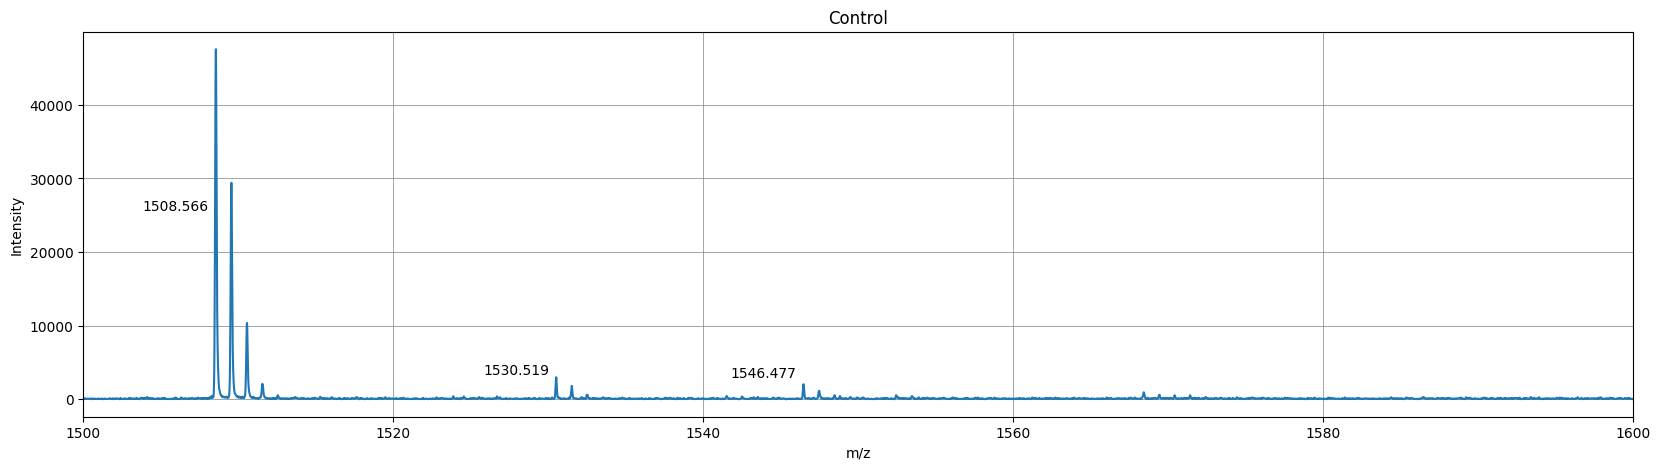

In [13]:
plot_spec(peaks['Control'],title='Control',figsize=(20,5))

In [14]:
plot_multiple_specs?

Signature:
plot_multiple_specs(
    peaks_list,
    labels_list,
    title=None,
    save_as=None,
    xrange=(1500, 1600),
    figsize=(20, 12),
    annotate=True,
)
Docstring: <no docstring>
File:      ~/uofc/Projects/BAT-seq/Experiments/2024_04_08/ms_peaks/fmc.py
Type:      function

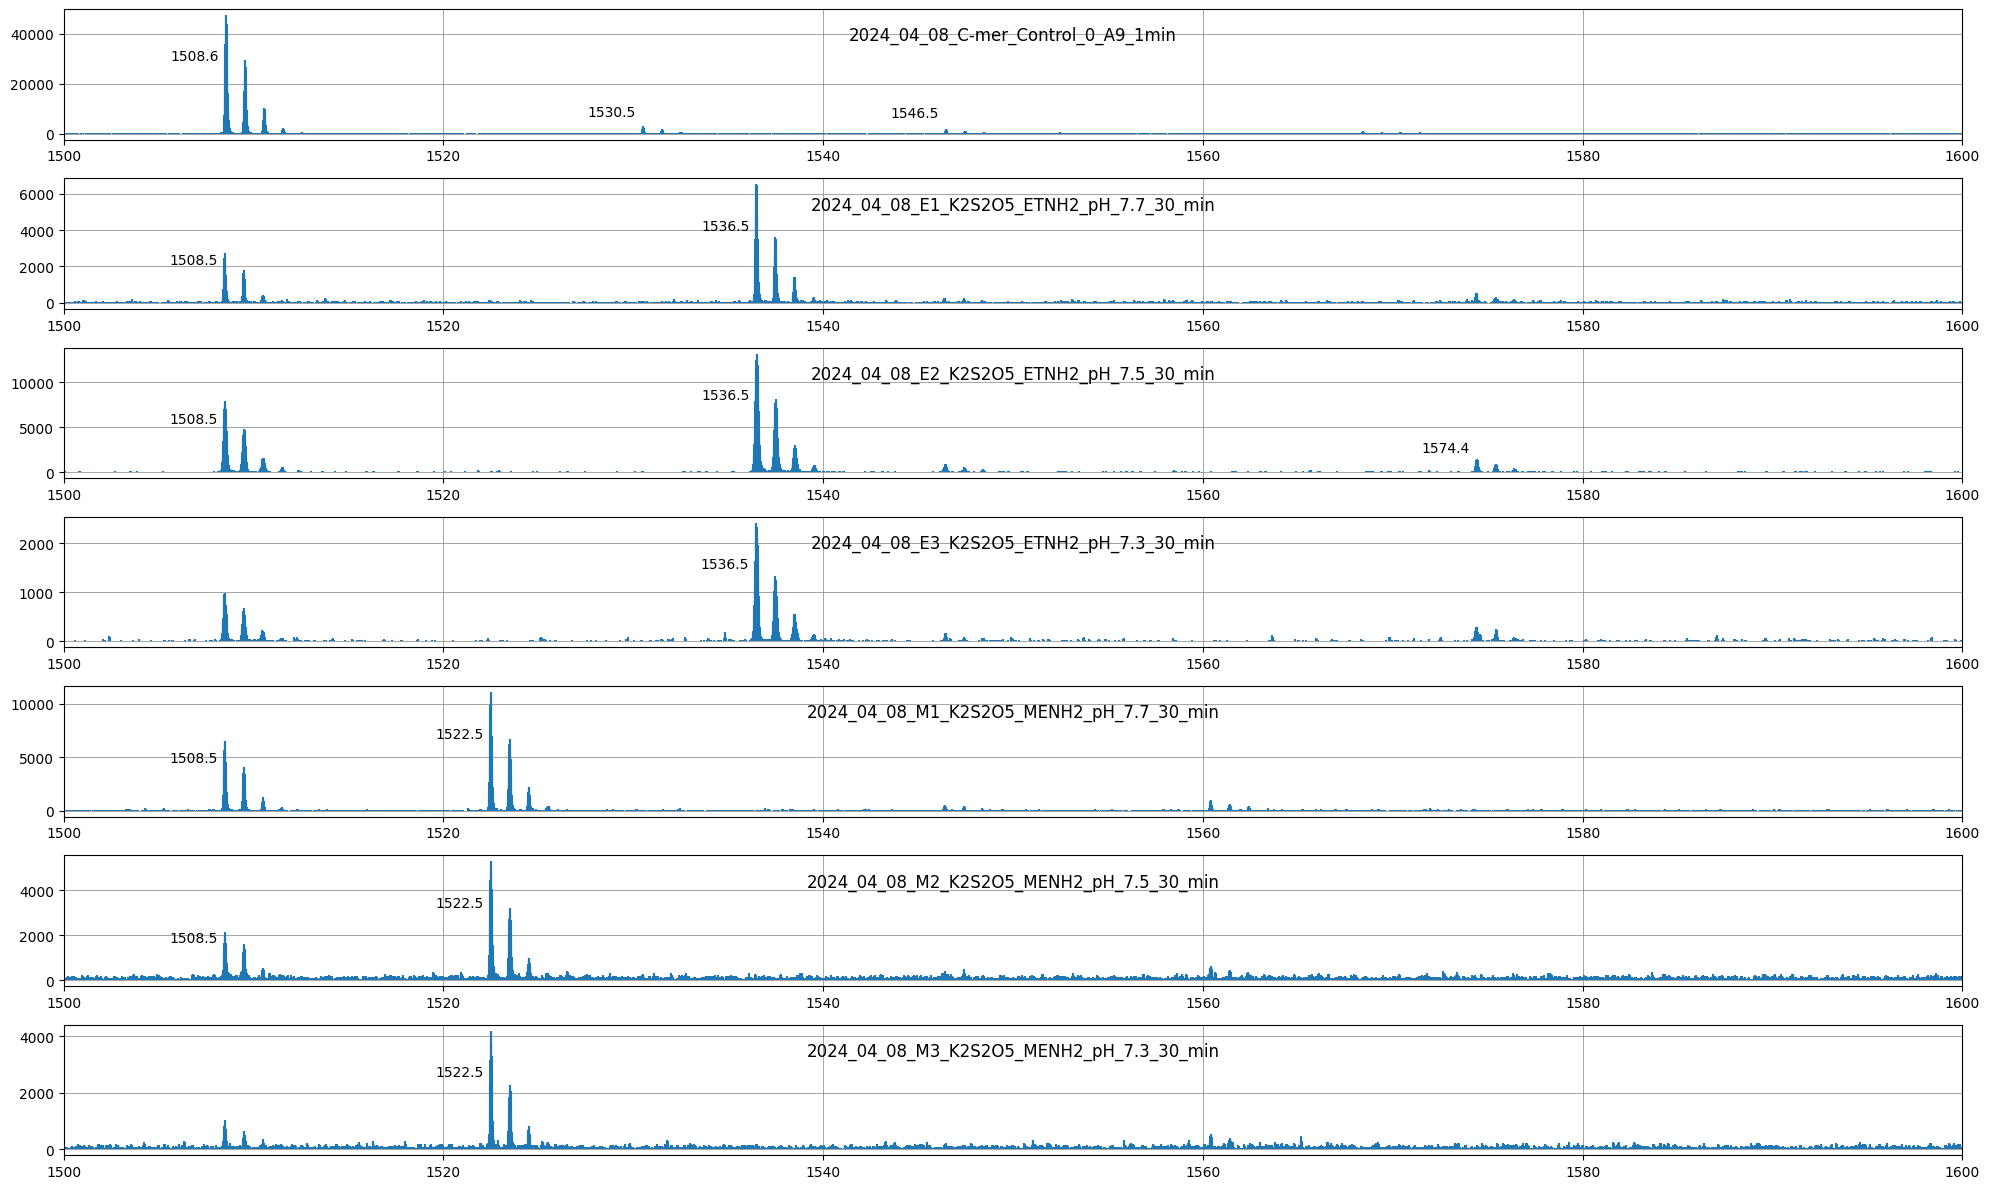

In [15]:
plot_multiple_specs(itemgetter(*e1_m3_30)(peaks), itemgetter(*e1_m3_30)(labels))
plot_multiple_specs(itemgetter(*e1_m3_30)(peaks), itemgetter(*e1_m3_30)(labels), save_as = figures/'ms_E1_M3_30_min')

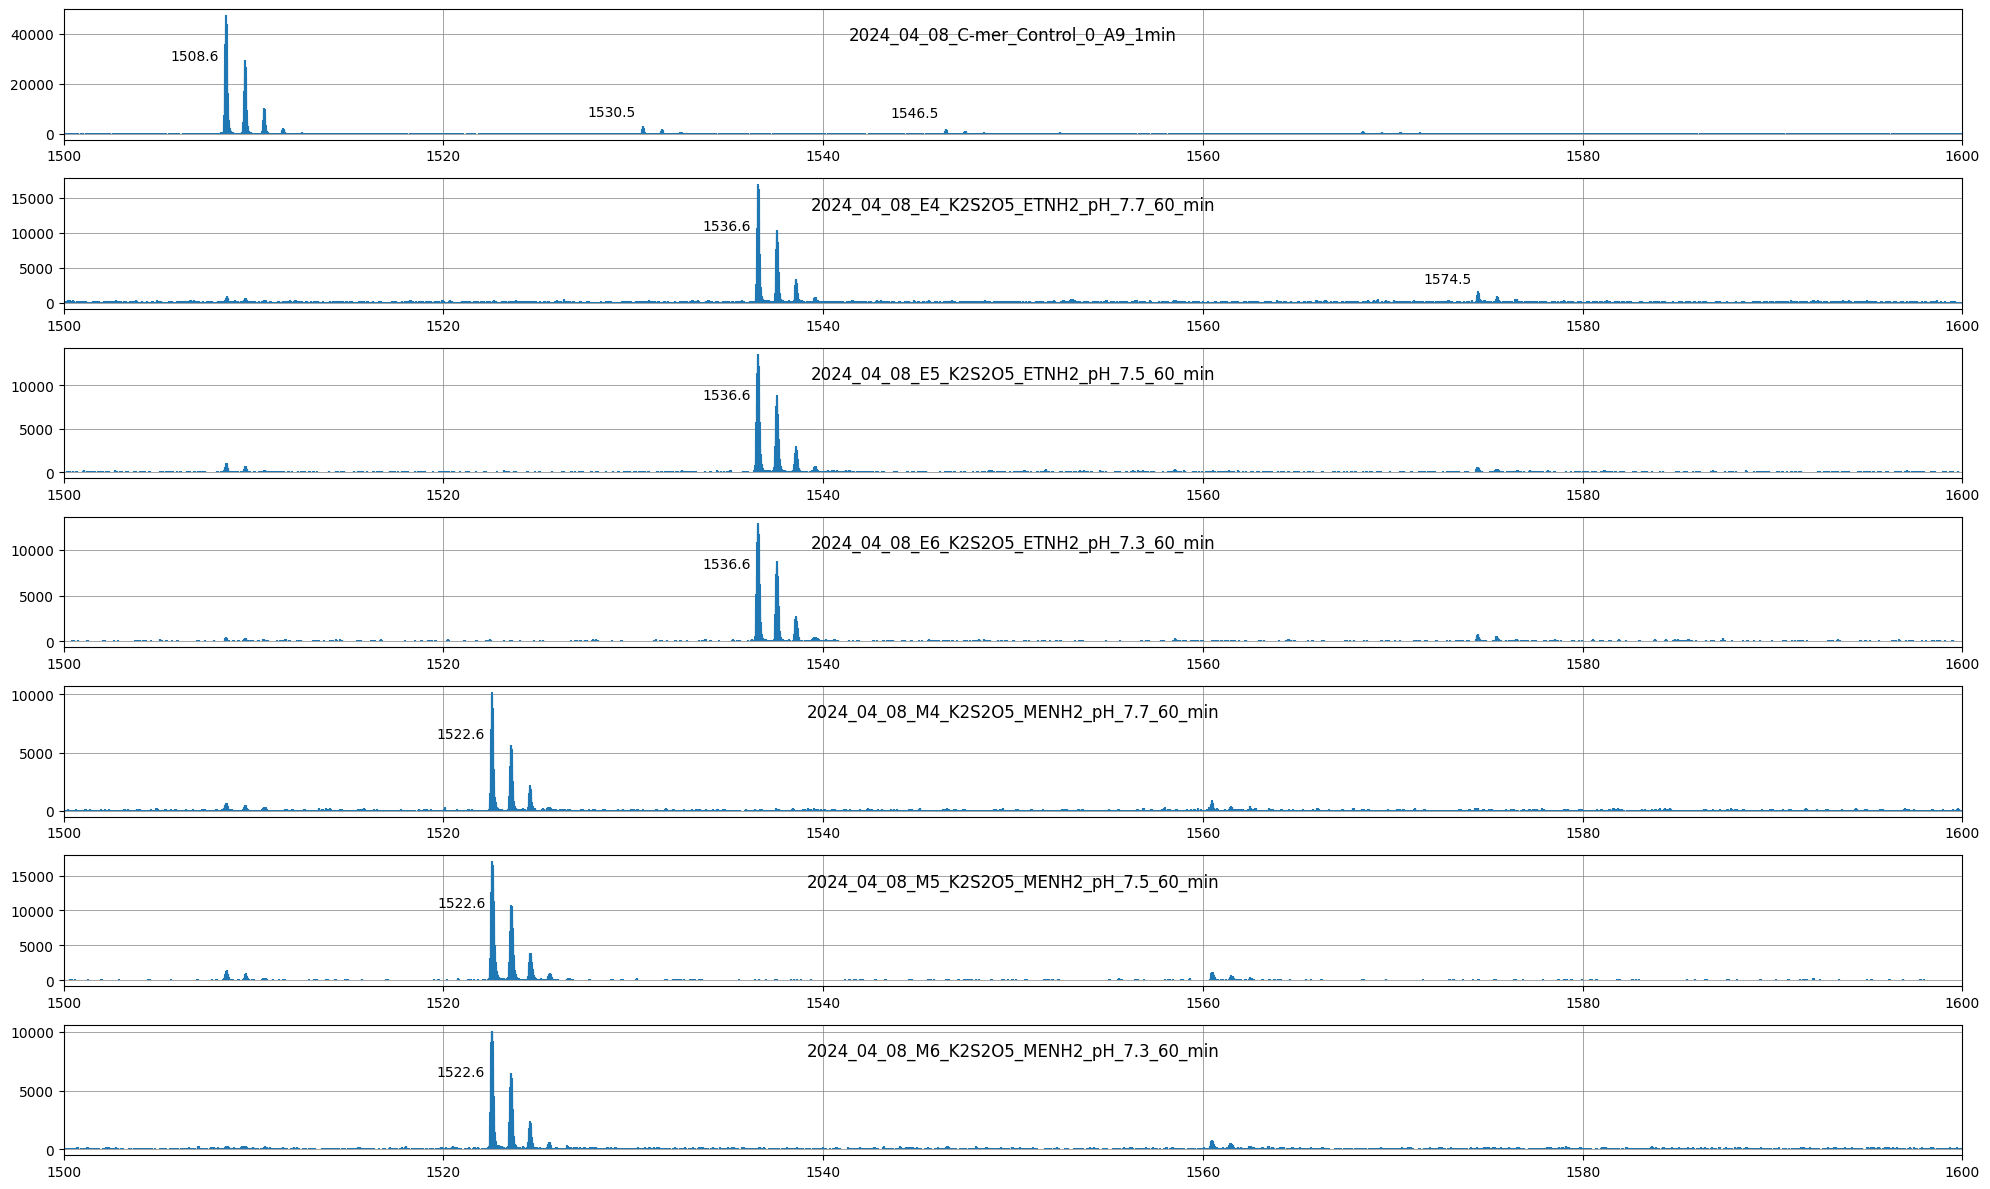

In [16]:
plot_multiple_specs(itemgetter(*e4_m6_60)(peaks), itemgetter(*e4_m6_60)(labels))
plot_multiple_specs(itemgetter(*e4_m6_60)(peaks), itemgetter(*e4_m6_60)(labels), save_as = figures/'ms_E4_M6_60_min')

### Calculate Efficiency

In [67]:
# C-> 4eC
es_eff = list(map(lambda s: efficiency_fec(s), itemgetter(*es)(peaks)))
es_eff

[0.71, 0.63, 0.71, 0.94, 0.93, 0.97]

In [68]:
# C -> 4mc
ms_eff = list(map(lambda s: efficiency_fmc(s), itemgetter(*ms)(peaks)))
ms_eff

[0.63, 0.71, 0.8, 0.94, 0.92, 0.97]

In [69]:
itemgetter(*es)(labels_short)

('pH 7.7 30 min',
 'pH 7.5 30 min',
 'pH 7.3 30 min',
 'pH 7.7 60 min',
 'pH 7.5 60 min',
 'pH 7.3 60 min')

In [64]:
labels_short

{'E1': 'E1: pH 7.7 30 min',
 'E2': 'E2: pH 7.5 30 min',
 'E3': 'E3: pH 7.3 30 min',
 'E4': 'E4: pH 7.7 60 min',
 'E5': 'E5: pH 7.5 60 min',
 'E6': 'E6: pH 7.3 60 min',
 'M1': 'M1: pH 7.7 30 min',
 'M2': 'M2: pH 7.5 30 min',
 'M3': 'M3: pH 7.3 30 min',
 'M4': 'M4: pH 7.7 60 min',
 'M5': 'M5: pH 7.5 60 min',
 'M6': 'M6: pH 7.3 60 min'}

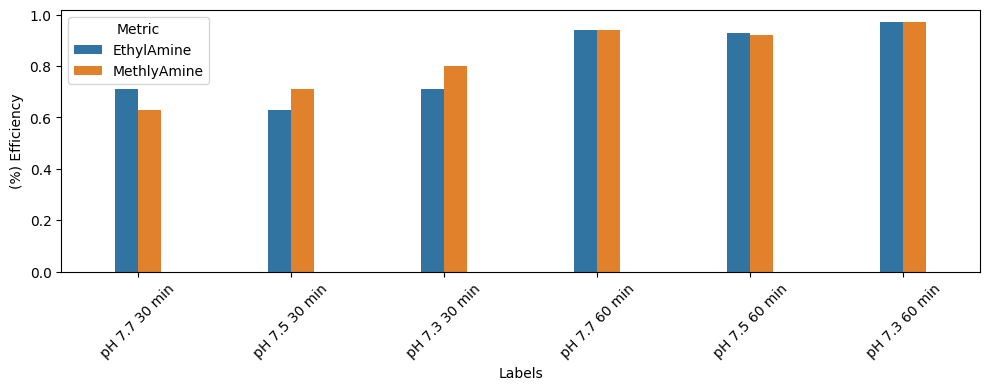

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({'Labels': itemgetter(*es)(labels_short), 'EthylAmine': es_eff, 'MethlyAmine': ms_eff})
data_long = pd.melt(data, id_vars='Labels', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 4)) 
sns.barplot(x='Labels', y='Value', hue='Metric', data=data_long, width=.3)
plt.ylabel('(%) Efficiency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/efficiency.png')
plt.show()
plt.close()

In [110]:
print(data)

          Labels  EthylAmine  MethlyAmine
0  pH 7.7 30 min        0.71         0.63
1  pH 7.5 30 min        0.63         0.71
2  pH 7.3 30 min        0.71         0.80
3  pH 7.7 60 min        0.94         0.94
4  pH 7.5 60 min        0.93         0.92
5  pH 7.3 60 min        0.97         0.97


In [113]:
data.to_csv('figures/efficiency.csv',index=False)

In [117]:
data.to_markdown('figures/efficiency.md',index=False)